In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
import warnings

In [70]:
df = pd.read_csv(r"C:\Users\srika\OneDrive\Documents\York\Sem-1 york\MBAN 6110 - Data Science 1\breast_cancer.csv")

In [71]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [72]:
dc = df.copy()

In [73]:
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [74]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012
symmetry_mean,569.0,NaN,NaN,NaN,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [76]:
df['diagnosis'] = df['diagnosis'].map({'M':'1', 'B':'0'})

In [77]:
df['diagnosis'] = df['diagnosis'].astype('int')

In [78]:
df['diagnosis'].unique()

array([1, 0])

In [79]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [80]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [81]:
# df=pd.concat([df,dc],axis=1)

In [85]:
df.groupby(['diagnosis', 'perimeter_worst']).size().unstack()
# must be used catagorical vs catagorical

perimeter_worst,50.41,54.49,56.65,57.17,57.26,58.08,58.36,59.16,59.90,60.90,...,202.40,205.70,206.00,206.80,211.50,211.70,214.00,220.80,229.30,251.20
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.columns

Index(['concave points_worst', 'perimeter_worst', 'concavity_mean',
       'diagnosis', 'diagnosis', 'radius_mean', 'texture_mean',
       'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
# univariate analysis - first we check the output variable and make sure it's balanced
df.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


change of data type using astype

In [ ]:
%%skip
sns.pairplot(df,hue = 'diagnosis')

UsageError: Cell magic `%%skip` not found.


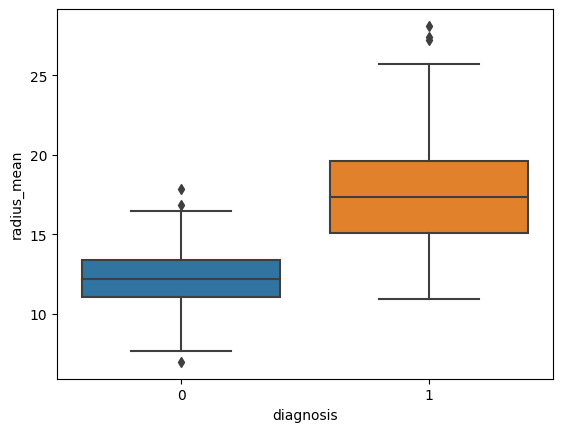

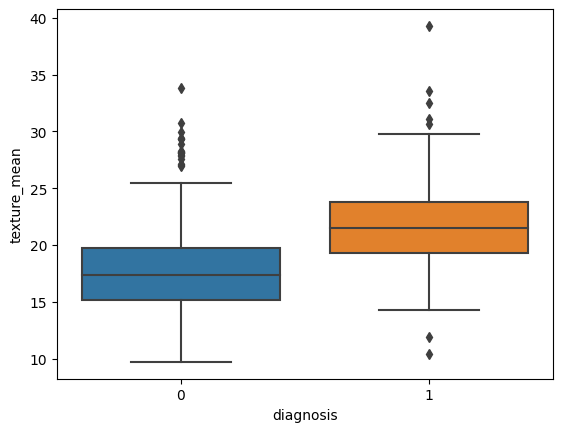

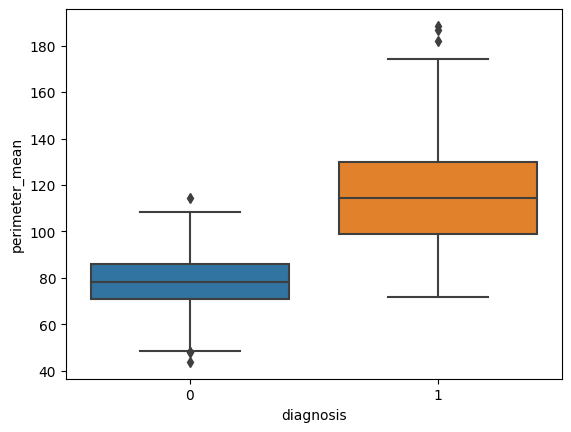

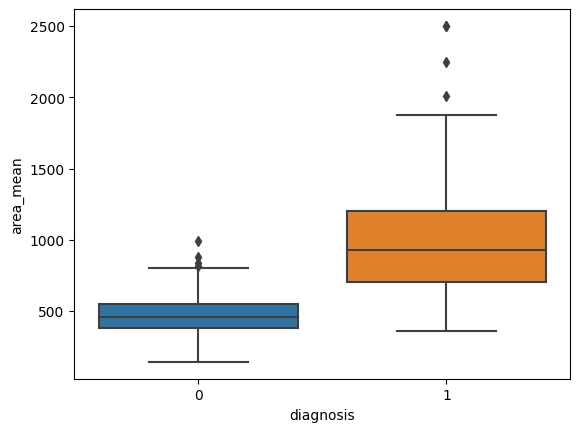

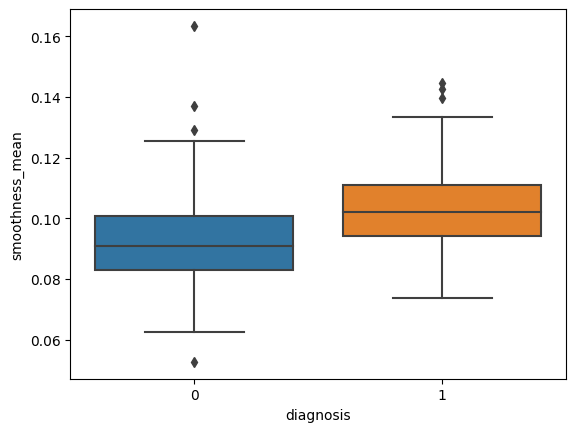

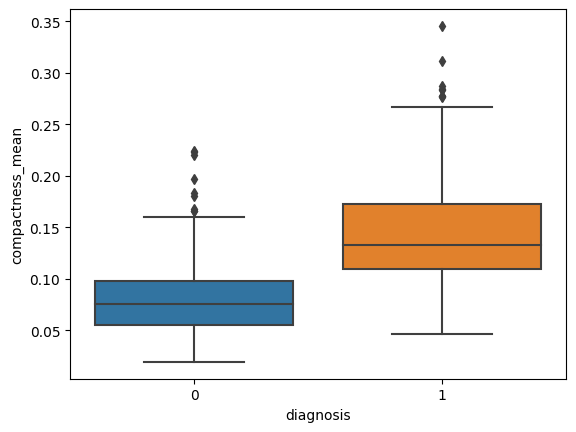

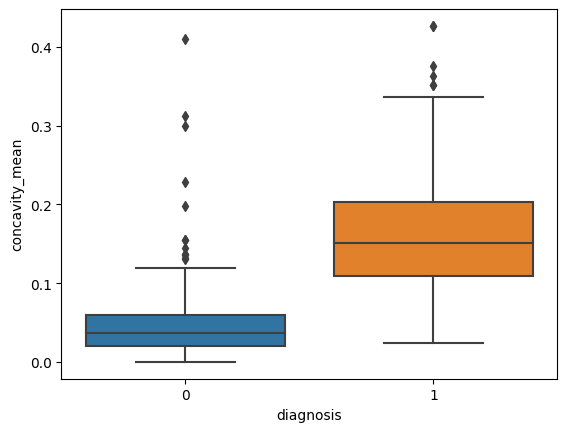

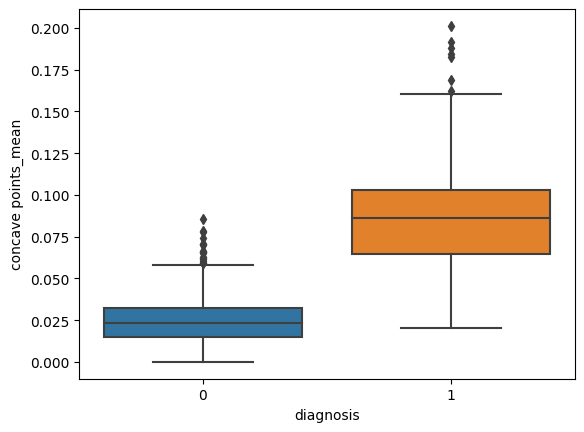

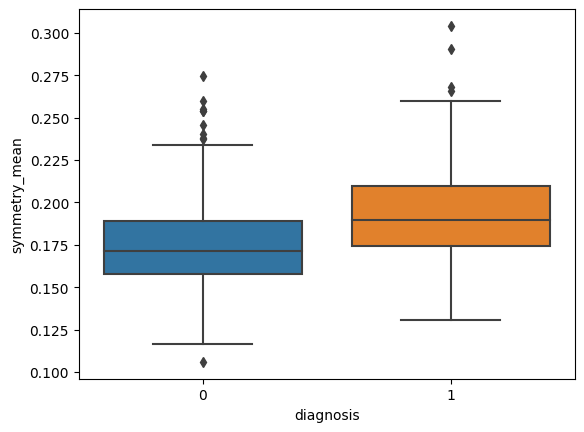

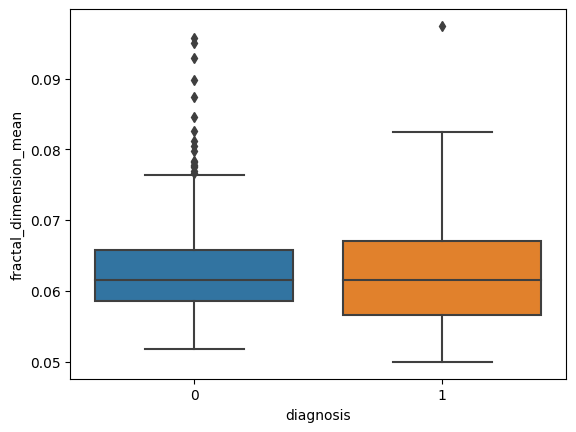

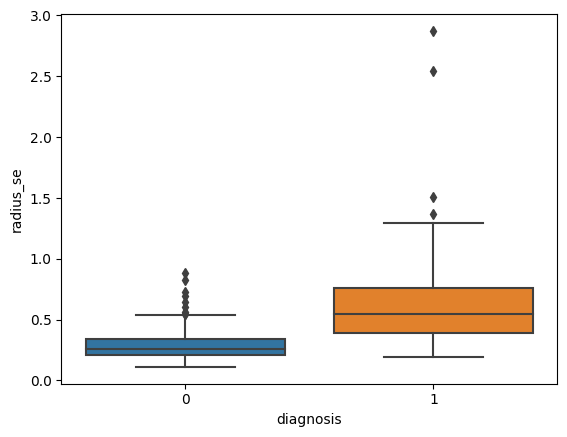

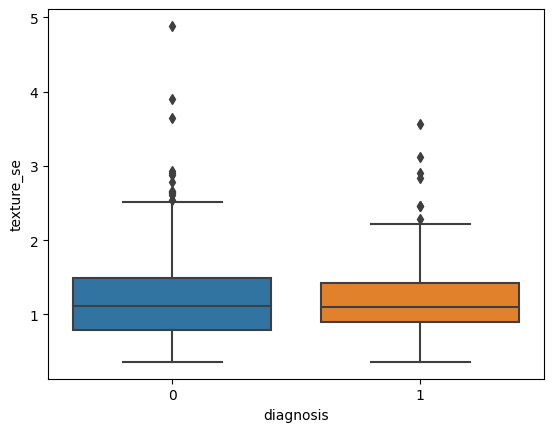

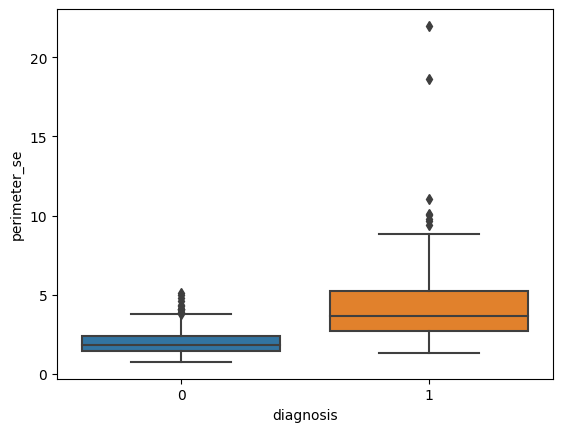

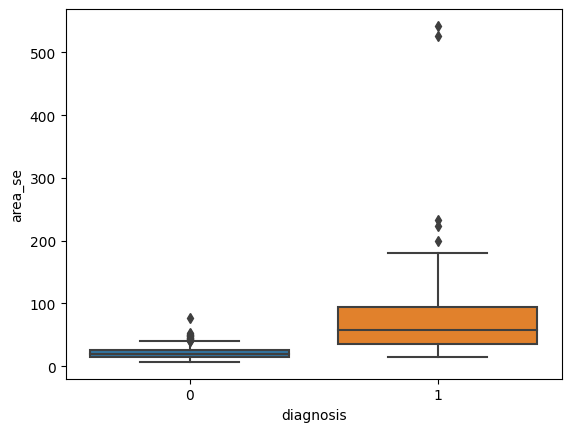

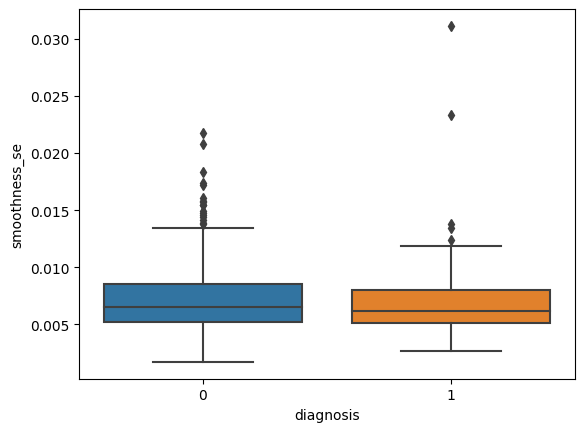

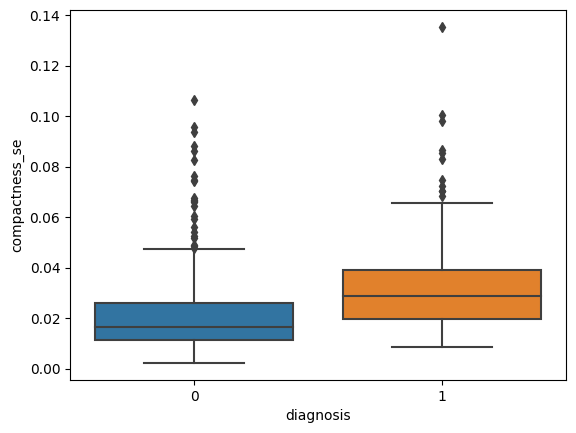

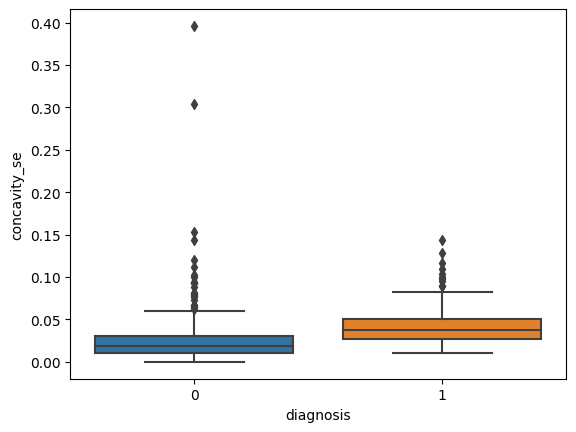

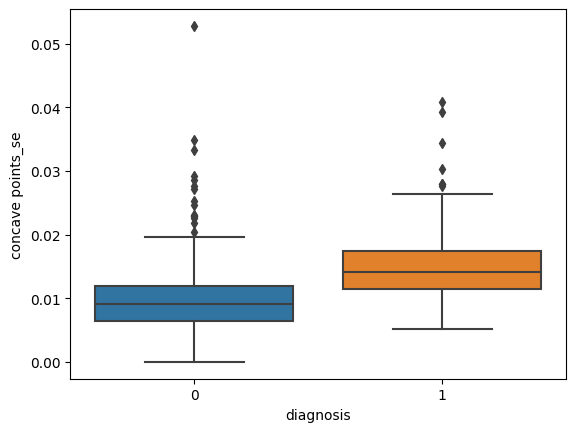

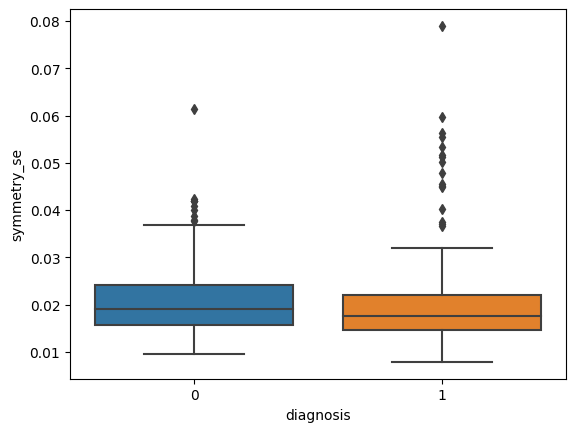

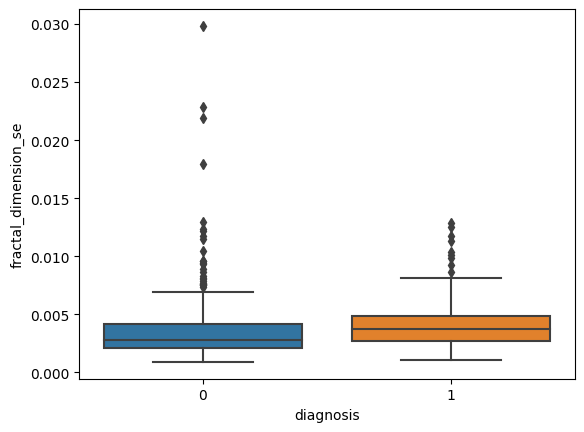

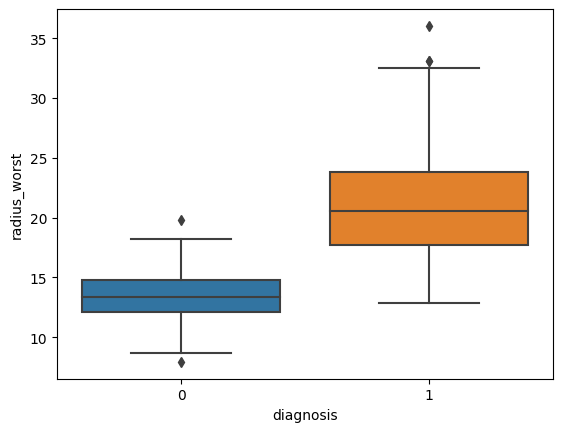

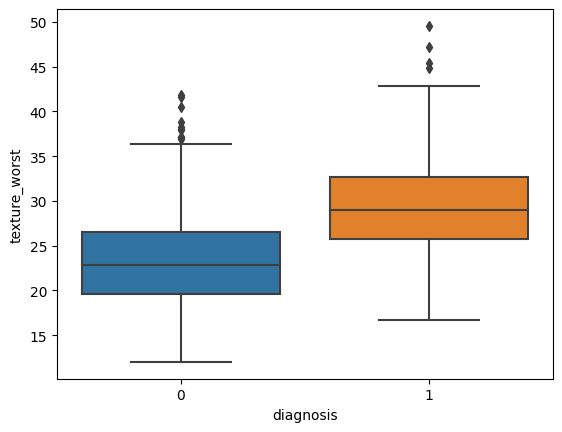

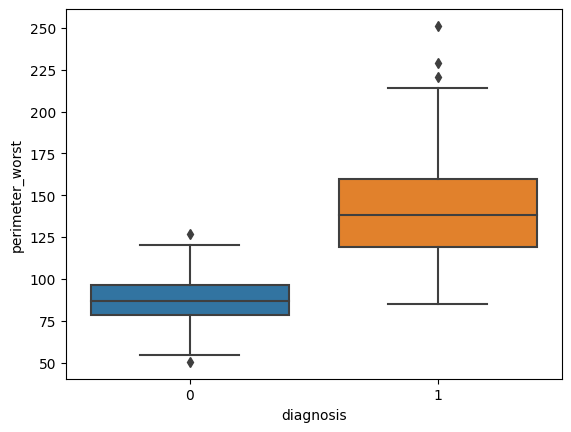

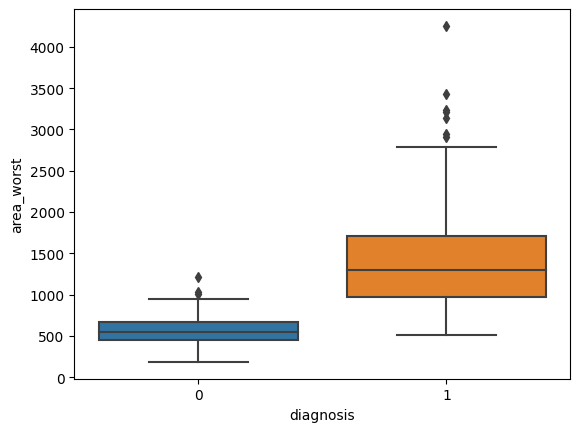

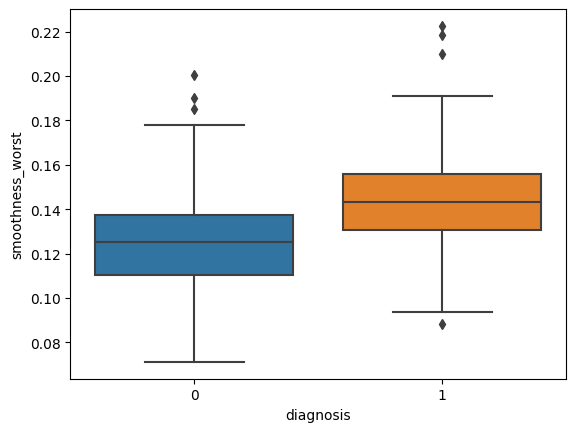

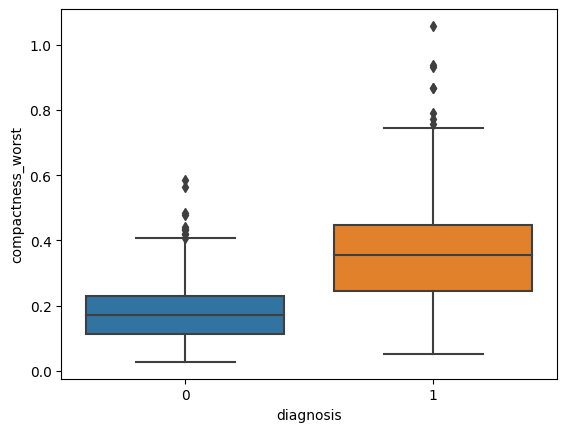

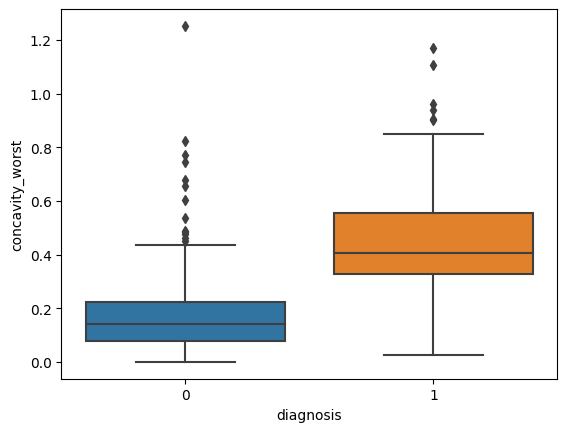

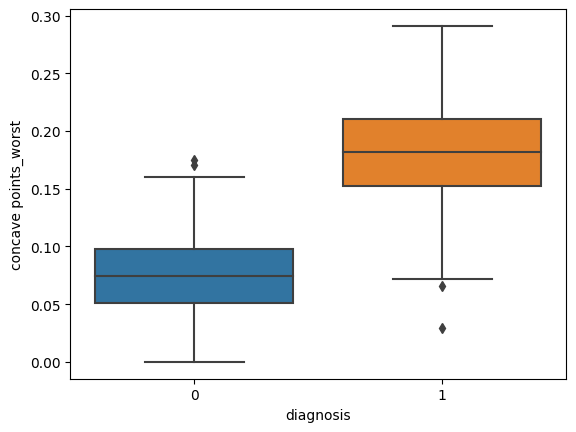

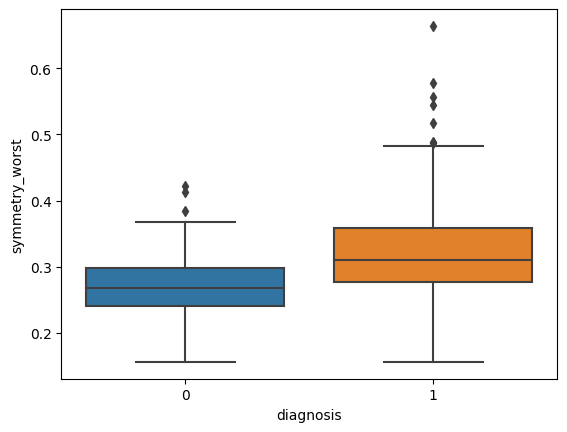

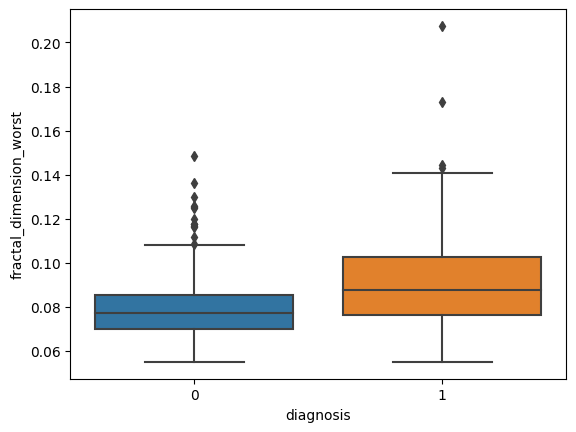

In [ ]:
for i in [ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'] : 
       sns.boxplot(x='diagnosis',y= i , data=df)
       plt.show()

In [ ]:
dc = df.corr()
dc['diagnosis'].sort_values(ascending=False).index

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
       'radius_mean', 'area_mean', 'concavity_mean', 'concavity_worst',
       'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se',
       'area_se', 'texture_worst', 'smoothness_worst', 'symmetry_worst',
       'texture_mean', 'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se',
       'fractal_dimension_se', 'symmetry_se', 'texture_se',
       'fractal_dimension_mean', 'smoothness_se'],
      dtype='object')

<Axes: >

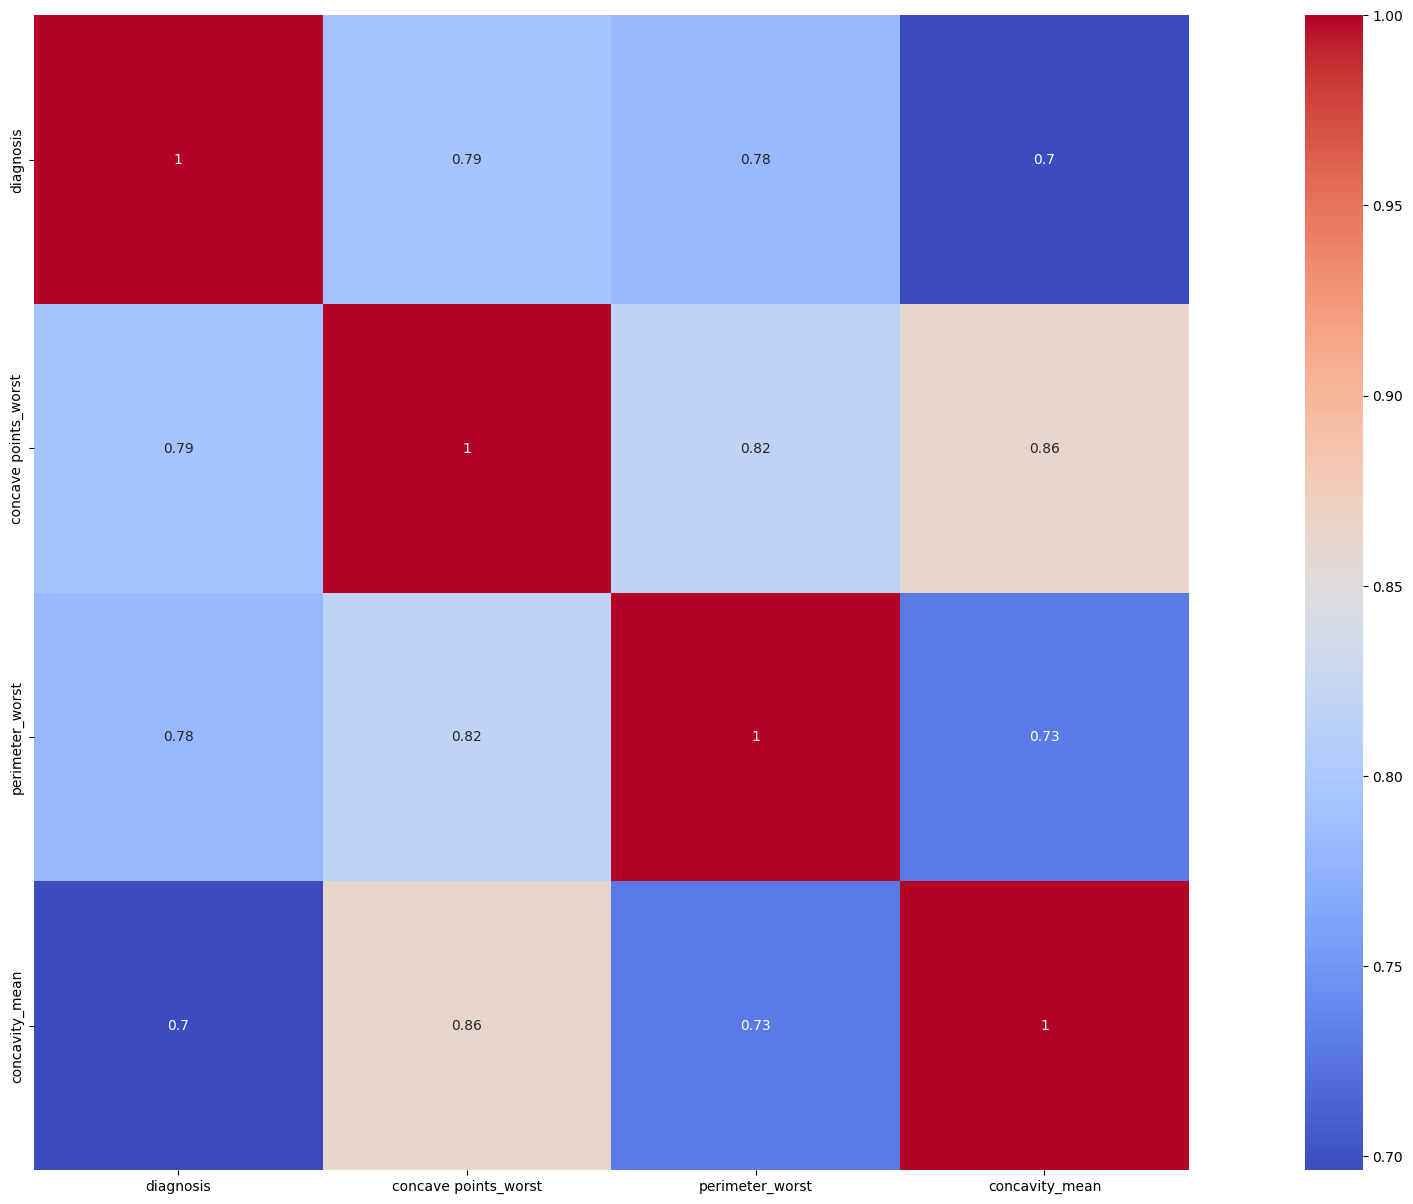

In [ ]:
 
df=df[['diagnosis','concave points_worst', 'perimeter_worst','concavity_mean']]
plt.figure(figsize=(30, 15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', square=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# splitting cat & num

num_columns = ['concave points_worst', 'perimeter_worst',
         'concavity_mean']
target = 'diagnosis'


num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_columns)])

X_train, X_test, y_train, y_test = train_test_split(df[num_columns], df[target], test_size=0.3, random_state=123)

In [1]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)
pca.explained_variance_ratio_

NameError: name 'df' is not defined

In [ ]:
df = pd.concat([df[num_columns],df['diagnosis']], axis=1)

In [ ]:
df.columns

Index(['concave points_worst', 'perimeter_worst', 'concavity_mean',
       'diagnosis'],
      dtype='object')

### modelling 

In [ ]:
log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=100)
tree = DecisionTreeClassifier(random_state=123)
svc = SVC(kernel='linear')
models = (log,nb,knn,tree,svc)

In [ ]:
x =df.drop(['diagnosis'],axis = 1)
y = df.diagnosis

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=123)

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)
tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=123)

In [ ]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict_proba(x_test)
yhat_tree = tree.predict_proba(x_test)

knn doesnt support probability predict 

In [ ]:
y_pred_log = log.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_tree = tree.predict(x_test)

In [ ]:
fpr_log, tpr_log, thresholds_l = roc_curve(y_test, yhat_log[:,1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_knn[:,1]) # * 
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, yhat_tree[:,1])

ValueError: y_true takes value in {'0', '1'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

ROC curve overlap

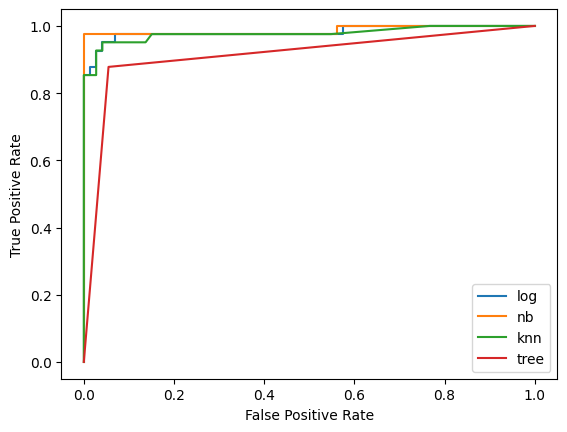

In [ ]:
plt.plot(fpr_log,tpr_log, label='log')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.plot(fpr_tree,tpr_tree, label='tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [ ]:
metrics = pd.DataFrame(index = ['accuracy','precision', 'recall'], columns =['logisticReg','NaiveBayes','KNN','Tree'])

In [ ]:
metrics.loc['accuracy','logisticReg'] = accuracy_score(y_pred=y_pred_log,y_true=y_test)
metrics.loc['precision','logisticReg'] = precision_score(y_pred=y_pred_log,y_true=y_test)
metrics.loc['recall','logisticReg'] = recall_score(y_pred=y_pred_log,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_log,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_log))

[[71  2]
 [ 3 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.95      0.93      0.94        41

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_nb,y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_nb,y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_nb,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_nb,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_nb))

[[73  0]
 [ 4 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      0.90      0.95        41

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
metrics.loc['accuracy','KNN'] = accuracy_score(y_pred=y_pred_knn,y_true=y_test)
metrics.loc['precision','KNN'] = precision_score(y_pred=y_pred_knn,y_true=y_test)
metrics.loc['recall','KNN'] = recall_score(y_pred=y_pred_knn,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_knn,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_knn))

[[72  1]
 [ 6 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.97      0.85      0.91        41

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
metrics.loc['accuracy','Tree'] = accuracy_score(y_pred=y_pred_tree,y_true=y_test)
metrics.loc['precision','Tree'] = precision_score(y_pred=y_pred_tree,y_true=y_test)
metrics.loc['recall','Tree'] = recall_score(y_pred=y_pred_tree,y_true=y_test)
print(confusion_matrix(y_pred=y_pred_tree,y_true=y_test))
print("Classification Report:")
print(classification_report(y_test,y_pred_tree))

[[69  4]
 [ 5 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        73
           1       0.90      0.88      0.89        41

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [ ]:
100*metrics

,logisticReg,NaiveBayes,KNN,Tree
accuracy,95.614035,96.491228,93.859649,92.105263
precision,95.0,100.0,97.222222,90.0
recall,92.682927,90.243902,85.365854,87.804878


In [ ]:
print(f1_score(y_pred_knn,y_test))
print(f1_score(y_pred_log,y_test))
print(f1_score(y_pred_nb,y_test))
print(f1_score(y_pred_tree,y_test))

0.9090909090909091
0.9382716049382716
0.9487179487179488
0.888888888888889


Cross validation 

In [ ]:
cv_scores = cross_val_score(log, x, y, cv=5)
print(cv_scores)
cv_scores.mean()

[0.88596491 0.90350877 0.92982456 0.92105263 0.92920354]


0.9139108834031984

hyper parameter testing

In [ ]:
# params log
params_log = {'C': [0.01, 0.1, 1.0, 10.0],'solver': ['lbfgs', 'liblinear']}
randomsearch_log = RandomizedSearchCV(log, params_log, cv=10, n_iter=100, scoring='accuracy')
gridsearch_log = GridSearchCV(log, params_log, cv=10, scoring='roc_auc')

gridsearch_log.fit(x_train, y_train)
randomsearch_log.fit(x_train, y_train)

print("Best parameters from GridSearch: ", gridsearch_log.best_params_)
print("Best parameters from RandomSearch: ", randomsearch_log.best_params_)

Best parameters from GridSearch:  {'C': 10.0, 'solver': 'liblinear'}
Best parameters from RandomSearch:  {'solver': 'lbfgs', 'C': 10.0}


In [ ]:
best_log_model = gridsearch_log.best_estimator_
yhat_log = best_log_model.predict_proba(x_test)
y_pred_log = best_log_model.predict(x_test)

In [ ]:
log_best = LogisticRegression(**gridsearch_log.best_params_)
cv_scores_log = cross_val_score(best_log_model, x_train, y_train, cv=5, scoring='accuracy')
best_log_model.fit(x_train, y_train)
y_pred_knn = best_log_model.predict(x_test)


In [ ]:
print(cv_scores_log)
print("\nK-Nearest Neighbors Metrics: ")
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

[0.94505495 0.93406593 0.92307692 0.92307692 0.9010989 ]

K-Nearest Neighbors Metrics: 
Accuracy:  0.9736842105263158


In [ ]:
Y = Y.astype('int')
X_balance,Y_balance = SMOTE().fit_sample(X,Y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

SyntaxError: invalid non-printable character U+00A0 (2451180507.py, line 3)

add AUC values ioon ROC +__curve

In [ ]:
# practice codes aaagin. add deatils to reference fiule.

SyntaxError: invalid syntax (2951811378.py, line 1)

In [ ]:
# add reasoning and markdowns.